In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fnmatch
import os
import re

In [3]:
# Receives a *.txt file from FEMM plot of field values.
# Returnos a (N, 2) numpy array

def getFemmRes(folder_name, in_file_name):

    cwd_file = os.getcwd()
    file_path = os.path.join(os.path.sep, cwd_file, folder_name, in_file_name)

    with open(file_path, 'r') as f:
        res_file_lines = f.readlines()

    # Read the values only if there is not a % in the file line
    line_data = np.array([np.array(line.split(), np.float64) for line in res_file_lines if not ('%' in line)])

    return line_data



In [4]:

def getElmerRes(folder_name, in_file_name):
    
    file_pre = in_file_name + '*'

    file_names = fnmatch.filter(os.listdir(folder_name), file_pre)

    file_name = [get_name for get_name in file_names if not('.names' in get_name)]

    matrix = np.empty((0,),float)

    for idx_fn in range(len(file_name)):

        cwd_file = os.getcwd()
        file_path = os.path.join(os.path.sep, cwd_file, folder_name, file_name[idx_fn])

        with open(file_path, 'r') as f:
            res_file_lines = f.readlines()

        for line in res_file_lines:

            line_data = np.array(line.split(), np.float64)
                        
            # The matrix is created empty. So, its size can be used as a test so I don't need to specify it priorly. 
            matrix = line_data.reshape(1,len(line_data)) if matrix.size == 0 else np.append(matrix,line_data.reshape(1,len(line_data)),axis=0)
                
    return matrix[matrix[:,2].argsort()]


In [5]:
def calcDistB(matrix):

    x = matrix[:,3]
    y = matrix[:,4]
    z = matrix[:,5]

    dist = np.sqrt((x - x[0])**2 + (y - y[0])**2 + (z - z[0])**2)

    return dist

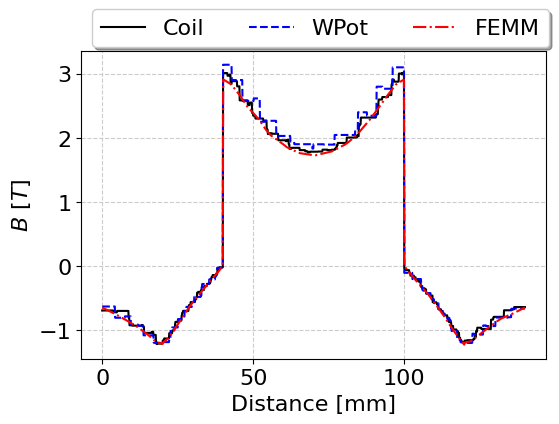

In [6]:
femm_file = 'res_femm_strd.txt'
femm_folder = 'femm'

femm_res = getFemmRes(femm_folder, femm_file)

femm_dist = femm_res[:,0]
femm_reBn = femm_res[:,2]
femm_imBn = femm_res[:,3]

elmer_folder_cl = 'closed_coil' + os.path.sep + 'res_cl_std'
elmer_file = 'line.dat'

elmer_res_cl = getElmerRes(elmer_folder_cl, elmer_file)

Be_re_z_cl = elmer_res_cl[:,8]
Be_im_z_cl = elmer_res_cl[:,11]

dist_cl = calcDistB(elmer_res_cl)

elmer_folder_wp = 'open_wpot' + os.path.sep + 'res_wp_std'
elmer_file = 'line.dat'

elmer_res_wp = getElmerRes(elmer_folder_wp, elmer_file)

Be_re_z_wp = elmer_res_wp[:,8]
Be_im_z_wp = elmer_res_wp[:,11]

dist_wp = calcDistB(elmer_res_wp)


fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(111)
ax.plot(dist_cl*1e3, Be_re_z_cl, c = 'k', ls = '-', label = 'Coil')
ax.plot(dist_wp*1e3, Be_re_z_wp, c = 'b', ls = '--', label = 'WPot')
ax.plot(femm_dist, femm_reBn, c = 'r', ls = '-.', label = 'FEMM')
ax.set_xlabel('Distance [mm]', fontsize = 16)
ax.set_ylabel('$B~[T]$', fontsize = 16)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize = 16, ncol = 3, 
          loc = 'upper left', fancybox=True, shadow=True, 
          bbox_to_anchor = (0, 1.17))




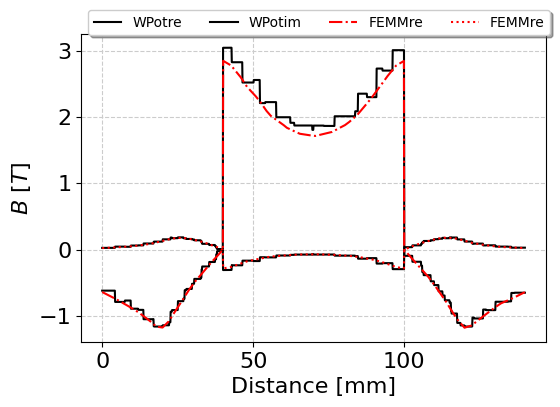

In [8]:
femm_file = 'res_femm_mss.txt'
femm_folder = 'femm'

femm_res = getFemmRes(femm_folder, femm_file)

femm_dist = femm_res[:,0]
femm_reBn = femm_res[:,2]
femm_imBn = femm_res[:,3]

# elmer_folder_cl = 'closed_coil' + os.path.sep + 'res_cl_ms'
# elmer_file = 'line.dat'

# elmer_res_cl = getElmerRes(elmer_folder_cl, elmer_file)

# Be_re_z_cl = elmer_res_cl[:,8]
# Be_im_z_cl = elmer_res_cl[:,11]

# dist_cl = calcDistB(elmer_res_cl)

elmer_folder_wp = 'open_wpot' + os.path.sep + 'res_wp_ms'
elmer_file = 'line.dat'

elmer_res_wp = getElmerRes(elmer_folder_wp, elmer_file)

Be_re_z_wp = elmer_res_wp[:,8]
Be_im_z_wp = elmer_res_wp[:,11]

dist_wp = calcDistB(elmer_res_wp)


fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(111)
# ax.plot(dist_cl*1e3, Be_re_z_cl, c = 'k', ls = '-', label = 'Coil')
ax.plot(dist_wp*1e3, Be_re_z_wp, c = 'k', ls = '-', label = 'WPotre')
ax.plot(dist_wp*1e3, Be_im_z_wp, c = 'k', ls = '-', label = 'WPotim')
ax.plot(femm_dist, femm_reBn, c = 'r', ls = '-.', label = 'FEMMre')
ax.plot(femm_dist, femm_imBn, c = 'r', ls = ':', label = 'FEMMre')
ax.set_xlabel('Distance [mm]', fontsize = 16)
ax.set_ylabel('$B~[T]$', fontsize = 16)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize = 10, ncol = 4, 
          loc = 'upper left', fancybox=True, shadow=True, 
          bbox_to_anchor = (0, 1.1))




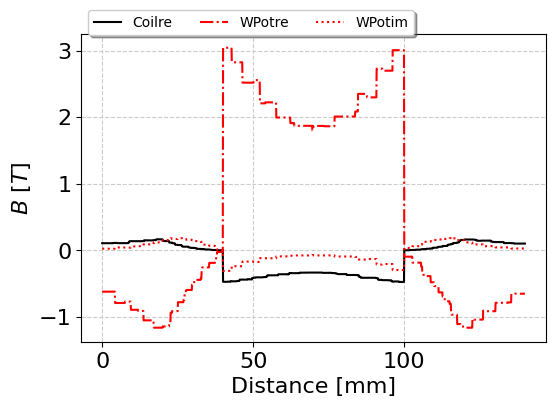

In [10]:
femm_file = 'res_femm_mss.txt'
femm_folder = 'femm'

femm_res = getFemmRes(femm_folder, femm_file)

femm_dist = femm_res[:,0]
femm_reBn = femm_res[:,2]
femm_imBn = femm_res[:,3]

elmer_folder_cl = 'closed_coil' + os.path.sep + 'res_cl_nc'
elmer_file = 'line.dat'

elmer_res_cl = getElmerRes(elmer_folder_cl, elmer_file)

Be_re_z_cl = elmer_res_cl[:,8]
Be_im_z_cl = elmer_res_cl[:,11]

dist_cl = calcDistB(elmer_res_cl)

elmer_folder_wp = 'open_wpot' + os.path.sep + 'res_wp_ms'
elmer_file = 'line.dat'

elmer_res_wp = getElmerRes(elmer_folder_wp, elmer_file)

Be_re_z_wp = elmer_res_wp[:,8]
Be_im_z_wp = elmer_res_wp[:,11]

dist_wp = calcDistB(elmer_res_wp)


fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(111)
ax.plot(dist_cl*1e3, Be_re_z_cl, c = 'k', ls = '-', label = 'Coilre')
# ax.plot(dist_cl*1e3, Be_im_z_cl, c = 'k', ls = '-', label = 'Coilre')
ax.plot(dist_wp*1e3, Be_re_z_wp, c = 'r', ls = '-.', label = 'WPotre')
ax.plot(dist_wp*1e3, Be_im_z_wp, c = 'r', ls = ':', label = 'WPotim')
# ax.plot(femm_dist, femm_reBn, c = 'r', ls = '-.', label = 'FEMMre')
# ax.plot(femm_dist, femm_imBn, c = 'r', ls = ':', label = 'FEMMre')
ax.set_xlabel('Distance [mm]', fontsize = 16)
ax.set_ylabel('$B~[T]$', fontsize = 16)
ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize = 10, ncol = 4, 
          loc = 'upper left', fancybox=True, shadow=True, 
          bbox_to_anchor = (0, 1.1))


